In [27]:
from pandas import read_csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [97]:
df = pd.read_csv("Regression_Assign/car_price_prediction.zip")

In [98]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [99]:
df.drop(["ID"],axis=1,inplace=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Levy              19237 non-null  object 
 2   Manufacturer      19237 non-null  object 
 3   Model             19237 non-null  object 
 4   Prod. year        19237 non-null  int64  
 5   Category          19237 non-null  object 
 6   Leather interior  19237 non-null  object 
 7   Fuel type         19237 non-null  object 
 8   Engine volume     19237 non-null  object 
 9   Mileage           19237 non-null  object 
 10  Cylinders         19237 non-null  float64
 11  Gear box type     19237 non-null  object 
 12  Drive wheels      19237 non-null  object 
 13  Doors             19237 non-null  object 
 14  Wheel             19237 non-null  object 
 15  Color             19237 non-null  object 
 16  Airbags           19237 non-null  int64 

In [101]:
df.drop(['Model','Levy','Engine volume','Mileage'],axis=1,inplace=True)

In [102]:
df.nunique()

Price               2315
Manufacturer          65
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Color                 16
Airbags               17
dtype: int64

In [103]:
df = pd.get_dummies(df,columns=df.select_dtypes("object").columns)

In [104]:
df.shape

(19237, 117)

In [105]:
#from sklearn import preprocessing

#x = df.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df = pd.DataFrame(x_scaled,columns=df.columns)

In [106]:
df = df.to_numpy().astype(np.float64)
#df = df.to_numpy().astype("float")

In [107]:
X, y = df[:, 1:], df[:, 0]

In [108]:
y = np.log(y)+1

In [109]:
#X, y = df.values[:, 1:], df.values[:, 0]

In [110]:
#from sklearn import preprocessing

#x = df[:,1:].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#X = pd.DataFrame(x_scaled,columns=df[:,1:].columns)

In [111]:
X.shape,y.shape

((19237, 116), (19237,))

In [112]:
# split into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13465, 116) (5772, 116) (13465,) (5772,)


In [113]:
n_features = X_train.shape[1]

In [114]:
n_features * 5 + 5 #(bias values)

585

In [115]:
# define model
model1 = Sequential()
model1.add(Dense(15, activation='relu', input_shape=(n_features,)))
model1.add(Dense(5, activation='relu'))
#model1.add(Dense(25, activation='relu'))
#model1.add(Dense(10, activation='relu'))
# model1.add(Dropout(0.2))
model1.add(Dense(1, activation='linear'))
#model1.add(Dense(2, activation='softmax'))

C:\Users\dbda\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [116]:
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 15)                  │           1,755 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 5)                   │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,841 (7.19 KB)

 Trainable params: 1,841 (7.19 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
# compile the model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [118]:
# fit the model (traning)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 2s - 5ms/step - loss: 4.5715 - mae: 1.4362 - val_loss: 2.6516 - val_mae: 1.3443
Epoch 2/100
295/295 - 1s - 2ms/step - loss: 2.4045 - mae: 1.1467 - val_loss: 2.9985 - val_mae: 1.5156
Epoch 3/100
295/295 - 0s - 1ms/step - loss: 2.3095 - mae: 1.1193 - val_loss: 2.4607 - val_mae: 1.2999
Epoch 4/100
295/295 - 1s - 3ms/step - loss: 2.3164 - mae: 1.1255 - val_loss: 2.1856 - val_mae: 1.1300
Epoch 5/100
295/295 - 0s - 1ms/step - loss: 2.3176 - mae: 1.1273 - val_loss: 2.1117 - val_mae: 1.0515
Epoch 6/100
295/295 - 0s - 2ms/step - loss: 2.2999 - mae: 1.1214 - val_loss: 2.0986 - val_mae: 1.0271
Epoch 7/100
295/295 - 0s - 1ms/step - loss: 2.2847 - mae: 1.1169 - val_loss: 2.0913 - val_mae: 1.0215
Epoch 8/100
295/295 - 1s - 2ms/step - loss: 2.2737 - mae: 1.1136 - val_loss: 2.0837 - val_mae: 1.0229
Epoch 9/100
295/295 - 1s - 2ms/step - loss: 2.2657 - mae: 1.1113 - val_loss: 2.0772 - val_mae: 1.0288
Epoch 10/100
295/295 - 0s - 2ms/step - loss: 2.2594 - mae: 1.1094 - val_loss: 2.07

In [119]:
# evaluate the model
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test MAE: %.3f' % mae)

Test MAE: 1.120


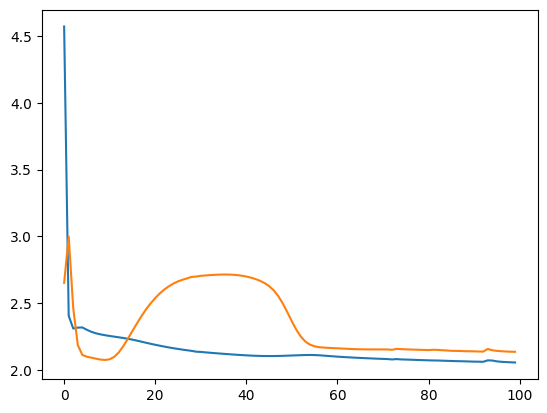

In [120]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # loss is training loss
plt.plot(history.history['val_loss']) # val_loss loss on the validation data / test loss

In [150]:
# define model
model1 = Sequential()
model1.add(Dense(15, activation='relu', input_shape=(n_features,)))
model1.add(Dense(5, activation='relu'))
#model1.add(Dense(25, activation='relu'))
#model1.add(Dense(10, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation='linear'))
#model1.add(Dense(2, activation='softmax'))

In [151]:
# compile the model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [152]:
# fit the model (traning)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 2s - 6ms/step - loss: 10065.7119 - mae: 62.8822 - val_loss: 64.3763 - val_mae: 7.8590
Epoch 2/100
295/295 - 0s - 1ms/step - loss: 932.5082 - mae: 17.5788 - val_loss: 27.1656 - val_mae: 4.9773
Epoch 3/100
295/295 - 0s - 2ms/step - loss: 349.4393 - mae: 10.4999 - val_loss: 7.7981 - val_mae: 2.5744
Epoch 4/100
295/295 - 0s - 1ms/step - loss: 199.1680 - mae: 7.7097 - val_loss: 5.5375 - val_mae: 2.1719
Epoch 5/100
295/295 - 0s - 1ms/step - loss: 123.8513 - mae: 6.2392 - val_loss: 6.3740 - val_mae: 2.3344
Epoch 6/100
295/295 - 1s - 2ms/step - loss: 87.8522 - mae: 5.5620 - val_loss: 5.5259 - val_mae: 2.1716
Epoch 7/100
295/295 - 0s - 2ms/step - loss: 62.8409 - mae: 4.8107 - val_loss: 3.9357 - val_mae: 1.8026
Epoch 8/100
295/295 - 0s - 1ms/step - loss: 47.7826 - mae: 4.2507 - val_loss: 3.5486 - val_mae: 1.6899
Epoch 9/100
295/295 - 0s - 1ms/step - loss: 36.1331 - mae: 3.7069 - val_loss: 3.0077 - val_mae: 1.4980
Epoch 10/100
295/295 - 0s - 1ms/step - loss: 28.6282 - mae: 3

In [153]:
# evaluate the model
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test MAE: %.3f' % mae)

Test MAE: 1.171


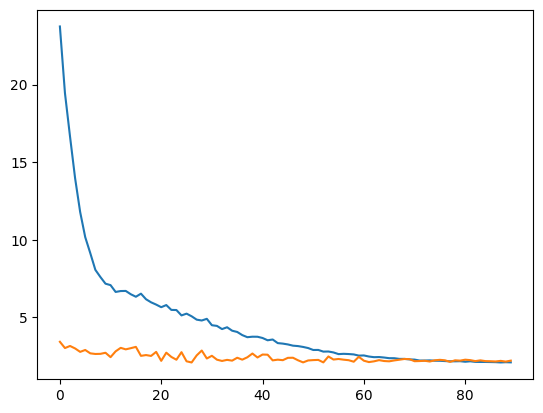

In [157]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][10:]) # loss is training loss
plt.plot(history.history['val_loss'][10:]) # val_loss loss on the validation data / test loss

In [131]:
from tensorflow.keras.layers import BatchNormalization

In [138]:
# define model
model1 = Sequential()
model1.add(Dense(15, activation='relu', input_shape=(n_features,)))
model1.add(Dense(5, activation='relu'))
#model1.add(Dense(25, activation='relu'))
#model1.add(Dense(10, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='linear'))
#model1.add(Dense(2, activation='softmax'))

C:\Users\dbda\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [139]:
# compile the model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [140]:
# fit the model (traning)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 2s - 7ms/step - loss: 89.6525 - mae: 9.3093 - val_loss: 470.8903 - val_mae: 21.6404
Epoch 2/100
295/295 - 1s - 2ms/step - loss: 49.9223 - mae: 6.8286 - val_loss: 13.3490 - val_mae: 3.2814
Epoch 3/100
295/295 - 1s - 2ms/step - loss: 16.3863 - mae: 3.7237 - val_loss: 3.9000 - val_mae: 1.7872
Epoch 4/100
295/295 - 0s - 2ms/step - loss: 4.2493 - mae: 1.8363 - val_loss: 2.7919 - val_mae: 1.3872
Epoch 5/100
295/295 - 1s - 2ms/step - loss: 2.5845 - mae: 1.2751 - val_loss: 2.5861 - val_mae: 1.2126
Epoch 6/100
295/295 - 1s - 2ms/step - loss: 2.5037 - mae: 1.1859 - val_loss: 2.5832 - val_mae: 1.1901
Epoch 7/100
295/295 - 0s - 2ms/step - loss: 2.5020 - mae: 1.1764 - val_loss: 2.5833 - val_mae: 1.1888
Epoch 8/100
295/295 - 0s - 2ms/step - loss: 2.5020 - mae: 1.1757 - val_loss: 2.5832 - val_mae: 1.1894
Epoch 9/100
295/295 - 0s - 2ms/step - loss: 2.5021 - mae: 1.1756 - val_loss: 2.5832 - val_mae: 1.1903
Epoch 10/100
295/295 - 0s - 2ms/step - loss: 2.5022 - mae: 1.1757 - val_los

In [141]:
# evaluate the model
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test MAE: %.3f' % mae)

Test MAE: 1.201


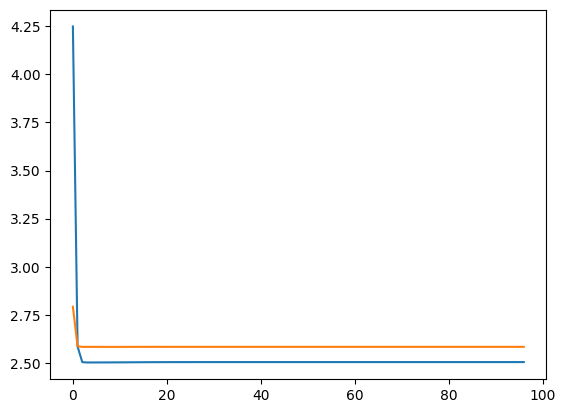

In [148]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][3:]) # loss is training loss
plt.plot(history.history['val_loss'][3:]) # val_loss loss on the validation data / test loss

In [158]:
from tensorflow.keras import regularizers

In [159]:
model1 = Sequential()
model1.add(Dense(5,  kernel_regularizer=regularizers.L1L2(),
                 activation='relu', input_shape=(n_features,)))
# model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [160]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [161]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 2s - 5ms/step - loss: 9607.0176 - mae: 73.8016 - val_loss: 410.2688 - val_mae: 20.1924
Epoch 2/100
295/295 - 1s - 2ms/step - loss: 118.1982 - mae: 9.6032 - val_loss: 12.6944 - val_mae: 3.1857
Epoch 3/100
295/295 - 0s - 2ms/step - loss: 4.6402 - mae: 1.5581 - val_loss: 2.6407 - val_mae: 1.1316
Epoch 4/100
295/295 - 0s - 2ms/step - loss: 2.4738 - mae: 1.1433 - val_loss: 2.5603 - val_mae: 1.1742
Epoch 5/100
295/295 - 0s - 1ms/step - loss: 2.4620 - mae: 1.1600 - val_loss: 2.5578 - val_mae: 1.1772
Epoch 6/100
295/295 - 1s - 2ms/step - loss: 2.4602 - mae: 1.1601 - val_loss: 2.5555 - val_mae: 1.1778
Epoch 7/100
295/295 - 0s - 1ms/step - loss: 2.4580 - mae: 1.1595 - val_loss: 2.5528 - val_mae: 1.1784
Epoch 8/100
295/295 - 1s - 2ms/step - loss: 2.4553 - mae: 1.1587 - val_loss: 2.5496 - val_mae: 1.1790
Epoch 9/100
295/295 - 0s - 2ms/step - loss: 2.4523 - mae: 1.1579 - val_loss: 2.5461 - val_mae: 1.1794
Epoch 10/100
295/295 - 0s - 1ms/step - loss: 2.4487 - mae: 1.1568 - val_

In [162]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 1.094


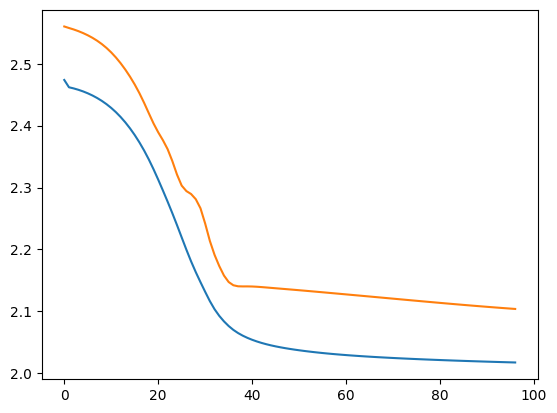

In [163]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'][3:]) # loss is training loss
plt.plot(history.history['val_loss'][3:]) # val_loss loss on the validation data / test loss